Bifurcation Diagram of the Cessi-Stommel  Model

In [1]:
using Revise, Plots
using BifurcationKit

# function to record information from a solution
recordFromSolution(x, p; k...) = (u1 = x[2], u2 = x[1])

function cessi!(dz, z, p, t = 0)
	(;p1, p2, p3) = p
    # p1 = alpha, p2 = mu, p3 = F
	u1, u2 = z
	dz[1] = p1 * (1 - u1) - u1 * (1 + p2 * (u2 - u1)*(u2 - u1))
	dz[2] =	p3 - u2 * (1 + p2 * (u2 - u1)*(u2 - u1))
	dz
end

# parameters of the model
par_cessi = (p1 = 360., p2 = 6.25, p3 = 0.)

# initial condition
z0 = zeros(2)

# bifurcation problem
prob = BifurcationProblem(cessi!, z0, par_cessi,
	# specify the continuation parameter
	(@optic _.p3), record_from_solution = recordFromSolution)

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: p3

In [2]:
# continuation options
opts_br = ContinuationPar(p_min = 0.0, p_max = 2.0, dsmax = 0.01,
	# number of eigenvalues
	nev = 2,
	# maximum number of continuation steps
	max_steps = 1000,)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 0.0001
  dsmax: Float64 0.01
  ds: Float64 0.01
  a: Float64 0.5
  p_min: Float64 0.0
  p_max: Float64 2.0
  max_steps: Int64 1000
  newton_options: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  save_to_file: Bool false
  save_sol_every_step: Int64 1
  nev: Int64 2
  save_eig_every_step: Int64 1
  save_eigenvectors: Bool true
  plot_every_step: Int64 10
  tol_stability: Float64 1.0e-10
  detect_fold: Bool true
  detect_bifurcation: Int64 3
  dsmin_bisection: Float64 1.0e-16
  n_inversion: Int64 2
  max_bisection_steps: Int64 15
  tol_bisection_eigenvalue: Float64 1.0e-16
  detect_event: Int64 0
  tol_param_bisection_event: Float64 1.0e-16
  detect_loop: Bool false


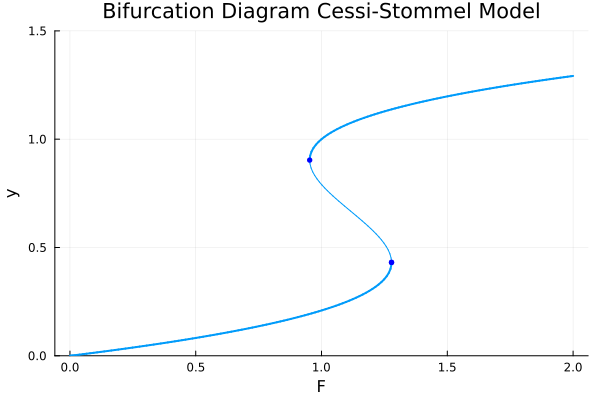

In [3]:
diagram = bifurcationdiagram(prob, PALC(),
	# very important parameter. It specifies the maximum amount of recursion
	# when computing the bifurcation diagram. It means we allow computing branches of branches of branches
	# at most in the present case.
	3,
	ContinuationPar(opts_br; ds = 0.001, dsmax = 0.01, n_inversion = 16, detect_bifurcation = 3)
	)

# scene = plot(diagram; code = (), title="$(size(diagram)) branches", legend = false)
    scene = plot(diagram; code = (), legend = false)
    ylims!(0, 1.5)
    title!("Bifurcation Diagram Cessi-Stommel Model")
    xlabel!("F")
    ylabel!("y")
    # savefig("myplot.png")